In [1]:
import pandas as pd

import T2T_ACE.duplication_evaluation as duplication_evaluation
from T2T_ACE.alignment_utilities import load_reference
import T2T_ACE.validator as v
import importlib
import T2T_ACE.dup_basepair_correction as dup_basepair_correction

INFO:numexpr.utils:Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
# Update the reference genomes to local path
class ReferenceLocations:
        hg002t2t = "/Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta"
        chm13 = "/Users/gaoyueya/Documents/Reference_Genome/chm13v2.0.fa.gz"
        hg38 = "/Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta"

# Load the minimap2 aligner from reference fasta file
# Load HG002 T2T reference
hg002t2t = load_reference(ReferenceLocations.hg002t2t)
# Load hg38 reference
hg38 = load_reference(ReferenceLocations.hg38)

INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/hg002v1.0.fasta
INFO:root:Loading reference from: /Users/gaoyueya/Documents/Reference_Genome/Homo_sapiens_assembly38.fasta


In [9]:
importlib.reload(v)

<module 'T2T_ACE.validator' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/validator.py'>

In [10]:
importlib.reload(dup_basepair_correction)

<module 'T2T_ACE.dup_basepair_correction' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/dup_basepair_correction.py'>

In [11]:
importlib.reload(duplication_evaluation)

<module 'T2T_ACE.duplication_evaluation' from '/Users/gaoyueya/Documents/GitHub/T2T-ACE/T2T_ACE/duplication_evaluation.py'>

In [69]:
# BasePair Correction Dev
#TODO: Check the alignment in hg38 and hg2 and obtain the difference between the real DUP event vs DRAGEN call DONE
#TODO: Complete the extension function DONE
#TODO: Incorporate those functions to dup_eval class DONE
#TODO: Added the alignment results of the corrected interval

In [6]:
# Good Example 1 (Shrink and Extend)
duplication_evaluation.eval_dup_interval("chr6:256330-381943", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr6:256330-381943
hg38 dup count: 1
interval: chr6:256329-381943	strand: 1, start: 0, end: 125614
hg2 dup count: 3
interval: chr6_MATERNAL:209000-339723	strand: 1, start: 0, end: 125614
interval: chr16_MATERNAL:35170607-35297731	strand: -1, start: 177, end: 125614
interval: chr6_PATERNAL:209734-338805	strand: 1, start: 0, end: 125614
----------------------------------------------------------------
Analyzing the DUP interval chr6:256330-381943(125614bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be moved to the right by 177bp
----------------------------------------------------------------
ANALYZING THE END OF THE DUP INTERVAL
-------------------

{'dup_interval': 'chr6:256330-381943',
 'dup_interval_size': 125614,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 3,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 1,
 'original_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_interval': 'chr6:256507-382462',
 'corrected_interval_size': 125956,
 'expanded_length': 342,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 1}

In [7]:
# Good example 2 (Extend on both ends)
duplication_evaluation.eval_dup_interval("chr14:105616092-105632532", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr14:105616092-105632532
hg38 dup count: 1
interval: chr14:105616091-105632532	strand: 1, start: 0, end: 16441
hg2 dup count: 4
interval: chr14_MATERNAL:107615085-107631645	strand: 1, start: 0, end: 16441
interval: chr14_MATERNAL:107634637-107651251	strand: 1, start: 0, end: 16441
interval: chr14_PATERNAL:105325487-105342047	strand: 1, start: 0, end: 16441
interval: chr14_PATERNAL:105345039-105361644	strand: 1, start: 0, end: 16441
----------------------------------------------------------------
Analyzing the DUP interval chr14:105616092-105632532(16441bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_le

{'dup_interval': 'chr14:105616092-105632532',
 'dup_interval_size': 16441,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 4,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 2,
 'original_dup_interval_classification': 'Homozygous Duplication',
 'corrected_interval': 'chr14:105612977-105649912',
 'corrected_interval_size': 36936,
 'expanded_length': 20495,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 4,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 1}

In [22]:
# Extension window is too big
duplication_evaluation.eval_dup_interval("chr10:39364453-39376272", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr10:39364453-39376272
hg38 dup count: 1
interval: chr10:39364452-39376272	strand: 1, start: 0, end: 11820
hg2 dup count: 6
interval: chr10_MATERNAL:39471150-39482958	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39533724-39545544	strand: 1, start: 0, end: 11820
interval: chr10_MATERNAL:39523295-39535103	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39481579-39493387	strand: 1, start: 0, end: 11815
interval: chr10_MATERNAL:39492008-39503816	strand: 1, start: 0, end: 11815
interval: chr10_PATERNAL:39517717-39529534	strand: 1, start: 0, end: 11820
input dup interval: chr10:39364453-39376272
hg38 dup count: 1
interval: chr10:39364452-39376272	strand: 1, start: 0, end: 11820
hg2 dup count: 6
interval: chr10_MATERNAL:39471150-39482958	strand: 1, start: 0, end: 11815
interval: chr10_M

{'dup_interval': 'chr10:39364453-39376272',
 'dup_interval_size': 11820,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 6,
 'original_hg2_mat_hit_count': 5,
 'original_hg2_pat_hit_count': 1,
 'dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_interval': 'chr10:39363271-39376268',
 'corrected_interval_size': 12998,
 'expanded_length': 1178,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 1}

In [12]:
# Check the performance on CNV on the sex chromosome
duplication_evaluation.eval_dup_interval("chrX:49017567-49018675", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chrX:49017567-49018675
hg38 dup count: 1
interval: chrX:49017566-49018675	strand: 1, start: 0, end: 1109
hg2 dup count: 2
interval: chrX_MATERNAL:48440458-48441566	strand: 1, start: 0, end: 1109
interval: chrX_MATERNAL:48441566-48442674	strand: 1, start: 1, end: 1109
----------------------------------------------------------------
Analyzing the DUP interval chrX:49017567-49018675(1109bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
Basepair correction Method doesn't support DUPs on chrX or chrY
----------------------------------------------------------------
ANALYZING THE END OF T

{'dup_interval': 'chrX:49017567-49018675',
 'dup_interval_size': 1109,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 2,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 0,
 'original_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_interval': 'chrX:49017567-49018676',
 'corrected_interval_size': 1110,
 'expanded_length': 1,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 2,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 0,
 'corrected_dup_interval_classification': 'Maternal Heterozygous Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 0}

In [23]:
# Not functioning as expected
# The copy seems more complicated than expected
duplication_evaluation.eval_dup_interval("chr10:46514225-46561077", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr10:46514225-46561077
hg38 dup count: 1
interval: chr10:46514224-46561077	strand: 1, start: 0, end: 46853
hg2 dup count: 5
interval: chr10_MATERNAL:47843348-47890485	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:48513086-48560225	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:49784540-49831705	strand: -1, start: 0, end: 46853
interval: chr10_PATERNAL:48447360-48494479	strand: 1, start: 0, end: 46853
interval: chr10_PATERNAL:49717006-49764147	strand: -1, start: 0, end: 46853
input dup interval: chr10:46514225-46561077
hg38 dup count: 1
interval: chr10:46514224-46561077	strand: 1, start: 0, end: 46853
hg2 dup count: 5
interval: chr10_MATERNAL:47843348-47890485	strand: 1, start: 0, end: 46853
interval: chr10_MATERNAL:48513086-48560225	strand: 1, start: 0, end: 46853
interval: chr10

{'dup_interval': 'chr10:46514225-46561077',
 'dup_interval_size': 46853,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 5,
 'original_hg2_mat_hit_count': 3,
 'original_hg2_pat_hit_count': 2,
 'dup_interval_classification': 'Homozygous Duplication',
 'corrected_interval': 'chr10:46396229-46598510',
 'corrected_interval_size': 202282,
 'expanded_length': 155429,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 5,
 'corrected_hg2_mat_hit_count': 3,
 'corrected_hg2_pat_hit_count': 2,
 'corrected_dup_interval_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 0}

In [495]:
# The extension here is not correct (fixed)
duplication_evaluation.eval_dup_interval("chr11:50653375-50655011", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr11:50653375-50655011
hg38 dup count: 1
interval: chr11:50653374-50655011	strand: 1, start: 0, end: 1637
hg2 dup count: 3
interval: chr11_MATERNAL:50763333-50764962	strand: 1, start: 0, end: 1637
interval: chr11_MATERNAL:50764962-50766590	strand: 1, start: 1, end: 1637
interval: chr11_PATERNAL:50775426-50777055	strand: 1, start: 0, end: 1637
----------------------------------------------------------------
Analyzing the DUP interval chr11:50653375-50655011(1637bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
extending window size 164
new interval chr11:50653211-50655011 1801
[[0,

{'dup_interval': 'chr11:50653375-50655011',
 'dup_interval_size': 1637,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 3,
 'corrected_interval': 'chr11:50653213-50655176',
 'corrected_interval_size': 1964,
 'expanded_length': 327,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 3,
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 0}

In [496]:
# Problems with unresolved region in hg38
# TODO: need to add unresolved region in hg38 to T2T-ACE
duplication_evaluation.eval_dup_interval("chr14:19725013-19956413", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr14:19725013-19956413
hg38 dup count: 1
interval: chr14:19725012-19956413	strand: 1, start: 0, end: 231401
hg2 dup count: 4
interval: chr14_MATERNAL:20204466-20435991	strand: 1, start: 0, end: 231401
interval: chr14_MATERNAL:21675534-21906954	strand: 1, start: 0, end: 231401
interval: chr14_PATERNAL:19420937-19652399	strand: 1, start: 0, end: 231401
interval: chr14_PATERNAL:18710102-18938130	strand: 1, start: 0, end: 231401
----------------------------------------------------------------
Analyzing the DUP interval chr14:19725013-19956413(231401bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to ch

{'dup_interval': 'chr14:19725013-19956413',
 'dup_interval_size': 231401,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 4,
 'corrected_interval': 'chr14:19611714-19956598',
 'corrected_interval_size': 344885,
 'expanded_length': 113484,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 4,
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 1}

In [24]:
duplication_evaluation.eval_dup_interval("chr15:20384360-20421468", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chrY:56844089-56883569
hg38 dup count: 1
interval: chrY:56844088-56883569	strand: 1, start: 0, end: 39481
hg2 dup count: 6
interval: chr14_MATERNAL:9404169-9444411	strand: -1, start: 3, end: 39481
interval: chr15_MATERNAL:6578413-6618720	strand: -1, start: 3, end: 39481
interval: chrY_PATERNAL:62049269-62088749	strand: 1, start: 0, end: 39481
interval: chr15_PATERNAL:6610977-6651274	strand: -1, start: 3, end: 39481
interval: chr14_PATERNAL:5954141-5994481	strand: -1, start: 3, end: 39481
interval: chr13_PATERNAL:3645459-3685747	strand: -1, start: 3, end: 39481
input dup interval: chrY:56844089-56883569
hg38 dup count: 1
interval: chrY:56844088-56883569	strand: 1, start: 0, end: 39481
hg2 dup count: 6
interval: chr14_MATERNAL:9404169-9444411	strand: -1, start: 3, end: 39481
interval: chr15_MATERNAL:657

{'dup_interval': 'chrY:56844089-56883569',
 'dup_interval_size': 39481,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 6,
 'original_hg2_mat_hit_count': 2,
 'original_hg2_pat_hit_count': 4,
 'dup_interval_classification': 'Homozygous Duplication',
 'corrected_interval': 'chrY:56844092-56887899',
 'corrected_interval_size': 43808,
 'expanded_length': 4327,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 6,
 'corrected_hg2_mat_hit_count': 2,
 'corrected_hg2_pat_hit_count': 4,
 'corrected_dup_interval_classification': 'Homozygous Duplication',
 'corrected_pos_accuracy': 1,
 'corrected_end_accuracy': 0}

In [25]:
v.align_interval("chr15:20384360-20432602", ReferenceLocations.hg38, hg38, hg002t2t)

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr2:16225124-16226720
hg38 dup count: 1
interval: chr2:16225123-16226720	strand: 1, start: 0, end: 1597
hg2 dup count: 2
interval: chr2_MATERNAL:16245181-16246778	strand: 1, start: 1, end: 1597
interval: chr2_PATERNAL:16272278-16273874	strand: 1, start: 1, end: 1597
input dup interval: chr2:16225124-16226720
hg38 dup count: 1
interval: chr2:16225123-16226720	strand: 1, start: 0, end: 1597
hg2 dup count: 2
interval: chr2_MATERNAL:16245181-16246778	strand: 1, start: 1, end: 1597
interval: chr2_PATERNAL:16272278-16273874	strand: 1, start: 1, end: 1597
----------------------------------------------------------------
Analyzing the DUP interval chr2:16225124-16226720(1597bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
------------------------------

{'dup_interval': 'chr2:16225124-16226720',
 'dup_interval_size': 1597,
 'original_hg38_hit_count': 1,
 'original_hg2_hit_count': 2,
 'original_hg2_mat_hit_count': 1,
 'original_hg2_pat_hit_count': 1,
 'dup_interval_classification': 'False Duplication',
 'corrected_interval': 'chr2:16225125-16226721',
 'corrected_interval_size': 1597,
 'expanded_length': 0,
 'corrected_hg38_hit_count': 1,
 'corrected_hg2_hit_count': 2,
 'corrected_hg2_mat_hit_count': 1,
 'corrected_hg2_pat_hit_count': 1,
 'corrected_dup_interval_classification': 'False Duplication',
 'corrected_pos_accuracy': 0,
 'corrected_end_accuracy': 0}

In [27]:
v.align_interval("chr15:20384360-20428891", ReferenceLocations.hg38, hg38, hg002t2t)

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE
0,chr1,789481,DRAGEN:GAIN:chr1:789482-224014488,N,<DUP>,150,PASS,END=224014488;SVTYPE=DUP;SVLEN=223225007;CIPOS...,GT:FT:GQ:PL:PR:SR,"0/1:PASS:602:652,0,663:11,5:33,21"
8,chr1,13225212,DRAGEN:GAIN:chr1:13225213-13247040,N,<DUP>,87,PASS,SVLEN=21828;SVTYPE=CNV;END=13247040;REFLEN=218...,GT:SM:CN:BC:GC:CT:AC:PE,"./1:2.06012:4:9:0.468527:0.487127:0.506047:18,8"
14,chr1,16605768,DRAGEN:GAIN:chr1:16605769-16645359,N,<DUP>,125,PASS,SVLEN=39591;SVTYPE=CNV;END=16645359;REFLEN=395...,GT:SM:CN:BC:GC:CT:AC:PE,"./1:2.80528:6:23:0.509308:0.483367:0.521987:19,12"
15,chr1,16715826,DRAGEN:GAIN:chr1:16715827-16727637,N,<DUP>,105,PASS,SVLEN=11811;SVTYPE=CNV;END=16727637;REFLEN=118...,GT:SM:CN:BC:GC:CT:AC:PE,"./1:2.59411:5:9:0.505207:0.513928:0.490729:18,26"
16,chr1,16879014,DRAGEN:GAIN:chr1:16879015-16949283,N,<DUP>,100,PASS,SVLEN=70269;SVTYPE=CNV;END=16949283;REFLEN=702...,GT:SM:CN:BC:GC:CT:AC:PE,"./1:2.01455:4:40:0.502455:0.50042:0.492678:16,18"


In [29]:
v.align_interval("chr15:20384360-20428912", ReferenceLocations.hg38, hg38, hg002t2t)

HG2 DUP intervals: 114


In [30]:
v.align_interval("chr15:20212550-20376210", ReferenceLocations.hg38, hg38, hg002t2t)

,interval
0,chr1:13225212-13247040
1,chr1:16605768-16645359
2,chr1:16715826-16727637
3,chr1:16879014-16949283
4,chr1:143207550-143272360


In [120]:
duplication_evaluation.eval_dup_interval("chr15:20212550-20376210", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

chr1:13225212-13247040
----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr1:13225212-13247040
hg38 dup count: 1
interval: chr1:13225211-13247040	strand: 1, start: 0, end: 21829
hg2 dup count: 3
interval: chr1_MATERNAL:12654730-12676537	strand: -1, start: 0, end: 21829
interval: chr1_MATERNAL:12868220-12890084	strand: 1, start: 0, end: 21829
interval: chr1_PATERNAL:12618932-12640735	strand: -1, start: 0, end: 21829
----------------------------------------------------------------
Analyzing the DUP interval chr1:13225212-13247040(21829bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos needs to be checked by extend_2_left
**Using extend_2_left to check the pos**
extending window size 2183
new interval chr1:132

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_classification,corrected_interval,corrected_interval_size,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_classification,corrected_pos_accuracy,corrected_end_accuracy,expanded_length
0,chr1:13225212-13247040,21829,1,3,2,1,Maternal Heterozygous Duplication,chr1:13220889-13327497,106609.0,1.0,4.0,2.0,2.0,Homozygous Duplication,1.0,1.0,84780.0
1,chr1:16605768-16645359,39592,1,5,2,3,Homozygous Duplication,chr1:16552870-16660888,108019.0,1.0,5.0,2.0,3.0,Homozygous Duplication,0.0,0.0,68427.0
2,chr1:16715826-16727637,11812,1,5,2,3,Homozygous Duplication,chr1:16680842-16733508,52667.0,1.0,5.0,2.0,3.0,Homozygous Duplication,1.0,0.0,40855.0
3,chr1:16879014-16949283,70270,1,4,2,2,Homozygous Duplication,chr1:16859848-16954363,94516.0,1.0,4.0,2.0,2.0,Homozygous Duplication,1.0,1.0,24246.0
4,chr1:143207550-143272360,64811,1,0,0,0,False Duplication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
duplication_evaluation.eval_dup_interval("chr16:70149443-70163608", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

,interval,dup_interval_size,original_hg38_hit_count,original_hg2_hit_count,original_hg2_mat_hit_count,original_hg2_pat_hit_count,original_dup_interval_classification,corrected_interval,corrected_interval_size,corrected_hg38_hit_count,corrected_hg2_hit_count,corrected_hg2_mat_hit_count,corrected_hg2_pat_hit_count,corrected_dup_interval_classification,corrected_pos_accuracy,corrected_end_accuracy,expanded_length
0,chr1:13225212-13247040,21829,1,3,2,1,Maternal Heterozygous Duplication,chr1:13220889-13327497,106609.0,1.0,4.0,2.0,2.0,Homozygous Duplication,1.0,1.0,84780.0
1,chr1:16605768-16645359,39592,1,5,2,3,Homozygous Duplication,chr1:16552870-16660888,108019.0,1.0,5.0,2.0,3.0,Homozygous Duplication,0.0,0.0,68427.0
2,chr1:16715826-16727637,11812,1,5,2,3,Homozygous Duplication,chr1:16680842-16733508,52667.0,1.0,5.0,2.0,3.0,Homozygous Duplication,1.0,0.0,40855.0
3,chr1:16879014-16949283,70270,1,4,2,2,Homozygous Duplication,chr1:16859848-16954363,94516.0,1.0,4.0,2.0,2.0,Homozygous Duplication,1.0,1.0,24246.0
4,chr1:143207550-143272360,64811,1,0,0,0,False Duplication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
duplication_evaluation.eval_dup_interval('chr16:70117234-70203693', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

,classification,count
0,TP:Homozygous,31
1,TP:Heterozygous,37
2,FP:Copy Neutral,40
3,FP: Wrong Ref,1
4,Unresolved,5


/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gaoyueya/miniconda3/envs/T2T-ACE-env/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


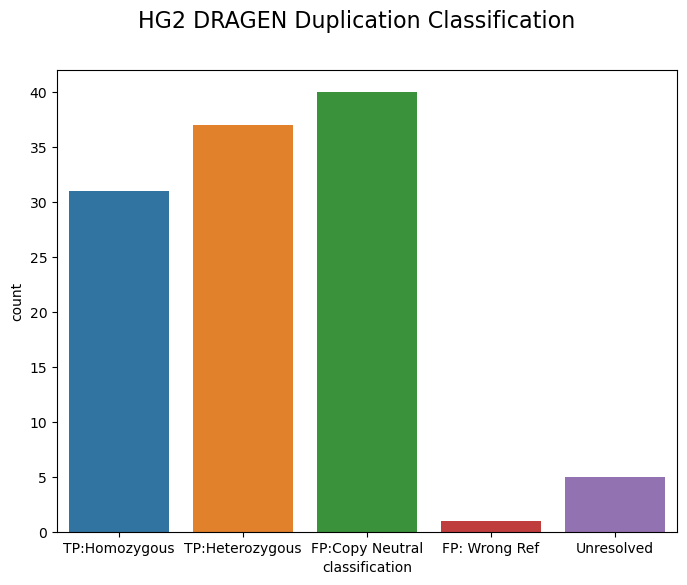

In [145]:
duplication_evaluation.eval_dup_interval('chr16:70110329-70203693', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

In [146]:
duplication_evaluation.eval_dup_interval('chr17:21661223-21677785', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

In [147]:
duplication_evaluation.eval_dup_interval('chr17:46135409-46292238', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chr1:143207549-143272360', 1, 0, 64811]], [])

In [148]:
duplication_evaluation.eval_dup_interval('chr17:46135409-46282220', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chr1:143207549-143272360', 1, 0, 64811]],
 [['chr1_MATERNAL:137062388-137084366', 1, 15554, 35336],
  ['chr1_MATERNAL:137169949-137188107', -1, 35357, 52402],
  ['chr1_MATERNAL:136633618-136647915', 1, 4306, 18204],
  ['chr1_MATERNAL:137058117-137072655', 1, 262, 15049],
  ['chr1_MATERNAL:137195193-137208845', -1, 35362, 48497],
  ['chr1_MATERNAL:137052404-137064847', 1, 3686, 16303],
  ['chr1_MATERNAL:137190094-137203437', -1, 35362, 46936],
  ['chr1_MATERNAL:137077068-137089670', 1, 7924, 20531],
  ['chr1_PATERNAL:146918597-146931789', 1, 11044, 23999],
  ['chr1_MATERNAL:137108619-137120238', 1, 53176, 64811]])

In [149]:
duplication_evaluation.eval_dup_interval('chr17:46205463-46208952', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([], [])

In [150]:
duplication_evaluation.eval_dup_interval('chr19:5849780-5851939', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chr2:89753992-89790690', 1, 80319, 117017],
  ['chr2:89673673-89685992', 1, 0, 12319]],
 [['chr2_MATERNAL:89978031-90016161', 1, 80320, 117017],
  ['chr2_PATERNAL:89903495-89941534', 1, 80320, 117017],
  ['chr2_MATERNAL:89109381-89147441', -1, 80320, 117017],
  ['chr2_PATERNAL:89025335-89063367', -1, 80320, 117017],
  ['chr2_MATERNAL:89908209-89920528', 1, 0, 12319]])

In [151]:
duplication_evaluation.eval_dup_interval('chr19:24330002-24405855', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([], [])

In [152]:
duplication_evaluation.eval_dup_interval('chr20:28556315-28631378', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chr6:61371372-61373011', 1, 2259, 3898],
  ['chr6:61369113-61370554', 1, 0, 1441]],
 [['chr6_PATERNAL:64889913-64891552', 1, 2259, 3898],
  ['chr6_PATERNAL:64893827-64895466', 1, 2259, 3898],
  ['chr6_MATERNAL:65274875-65276515', 1, 2259, 3898],
  ['chr6_PATERNAL:64887637-64889078', 1, 0, 1441],
  ['chr6_PATERNAL:64891552-64892992', 1, 1, 1441],
  ['chr6_MATERNAL:65272599-65274040', 1, 0, 1441]])

In [153]:
duplication_evaluation.eval_dup_interval('chr20:28769370-28771412', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([], [])

In [154]:
duplication_evaluation.eval_dup_interval('chr21:8998786-9041715', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chr14:16113232-16127603', 1, 17418, 31789],
  ['chr14:16095814-16105376', 1, 0, 9562]],
 [['chr14_MATERNAL:15055448-15069820', 1, 17418, 31789],
  ['chr22_MATERNAL:14082543-14096917', 1, 17418, 31789],
  ['chr22_PATERNAL:10096233-10110605', 1, 17418, 31789],
  ['chr14_PATERNAL:13183563-13197905', 1, 17418, 31760],
  ['chr14_MATERNAL:15037629-15046343', 1, 816, 9562],
  ['chr22_PATERNAL:10078399-10087079', 1, 816, 9562],
  ['chr14_PATERNAL:13165784-13174488', 1, 816, 9562],
  ['chr14_MATERNAL:15949033-15949749', 1, 0, 716]])

In [155]:
duplication_evaluation.eval_dup_interval('chr21:10325000-10467307', ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([], [])

In [156]:
duplication_evaluation.eval_dup_interval("chr22:12406545-12424826", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chr19:24895924-24898313', 1, 0, 2389],
  ['chr19:24904771-24906799', 1, 8847, 10875]],
 [['chr19_MATERNAL:25938197-25941834', 1, 2, 2389],
  ['chr19_PATERNAL:25461977-25465332', 1, 2, 2389],
  ['chr19_MATERNAL:25948066-25950094', 1, 8847, 10875],
  ['chr19_PATERNAL:25471563-25473591', 1, 8847, 10875]])

In [157]:
duplication_evaluation.eval_dup_interval("chr1:13225212-13247040", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([], [])

In [158]:
duplication_evaluation.eval_dup_interval("chr1:16605768-16645359", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

([['chrY:10682442-10691573', 1, 11708, 20839],
  ['chrY:10670734-10674058', 1, 0, 3324],
  ['chrY:10676544-10679715', 1, 5810, 8981]],
 [['chrY_PATERNAL:10936684-10945840', 1, 11708, 20839],
  ['chrY_PATERNAL:10910090-10913419', 1, 0, 3324],
  ['chrY_PATERNAL:10917945-10930322', 1, 5810, 8981]])

In [396]:
duplication_evaluation.eval_dup_interval("chr1:16715826-16727637", ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------
input dup interval: chr1:16715826-16727637
hg38 dup count: 1
interval: chr1:16715825-16727637	strand: 1, start: 0, end: 11812
hg2 dup count: 5
interval: chr1_MATERNAL:16447338-16459161	strand: -1, start: 0, end: 11812
interval: chr1_MATERNAL:16716721-16728525	strand: -1, start: 0, end: 11812
interval: chr1_PATERNAL:16272631-16284438	strand: -1, start: 0, end: 11812
interval: chr1_PATERNAL:16854882-16866695	strand: 1, start: 0, end: 11812
interval: chr1_PATERNAL:16546220-16558022	strand: -1, start: 0, end: 11812
----------------------------------------------------------------
Analyzing the DUP interval chr1:16715826-16727637(11812bp)
----------------------------------------------------------------
ANALYZING THE POS OF THE DUP INTERVAL
----------------------------------------------------------------
The called interval pos

'chr1:16680842-16733508'

In [ ]:
duplication_evaluation.eval_dup_interval("chr1:789481-224014488"
                                         , ReferenceLocations.hg38, ReferenceLocations.hg002t2t, hg38, hg002t2t).analyzeDuplicationIntervals()

----------------------------------------------------------------
Alignment Report of Original Interval
----------------------------------------------------------------


In [18]:
# Addressing the DUP interval that has a large chunk of unresolved region
# Load the gap interval that is not resolved in hg38 (USCS gap.txt)
import pandas as pd
gap_df = pd.read_csv("../resources/ucsc_hg38_gap_region.txt", sep="\t", index_col=[0],header=None)
# Gather gap intervals from gap_df
gap_intervals = [f"{row[1]}:{row[2]}-{row[3]}" for index,row in gap_df.iterrows()]
print(gap_intervals[0:5])
print("Number of gap intervals: ", len(gap_intervals))

['chr1:0-10000', 'chr1:207666-257666', 'chr1:297968-347968', 'chr1:535988-585988', 'chr1:2702781-2746290']
Number of gap intervals:  829


In [20]:
HG2_DRAGEN_cnv_path = "/Users/gaoyueya/Documents/Projects/TAG-Ticket1639/DRAGEN4_2_4_visualization/DRAGEN_Output/NA24385.cnv_sv.vcf"
def read_vcf(vcf_path):
    df = pd.read_csv(vcf_path, comment='#', sep='\t', header=None, names=['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE'])
    return df
HG2_DRAGEN_cnv = read_vcf(HG2_DRAGEN_cnv_path)
HG2_DRAGEN_pass_cnv = HG2_DRAGEN_cnv[HG2_DRAGEN_cnv['FILTER']=='PASS']
HG2_DRAGEN_pass_cnv.head()

# Gather all the intervals for DEL and DUP from HG2 DRAGEN PASS
DEL_pass_intervals = []
DUP_pass_intervals = []
for index, row in HG2_DRAGEN_pass_cnv.iterrows():
    interval = row['CHROM'] + ':' + str(row['POS']) + '-' + str(row['INFO'].split('END=')[1].split(';')[0])
    if row['ALT'] == '<DEL>':
        DEL_pass_intervals.append(interval)
    elif row['ALT'] == '<DUP>':
        DUP_pass_intervals.append(interval)

# Remove the DUP interval that is a known FP
DUP_pass_intervals.remove("chr1:789481-224014488") # This is a known FP

print('HG2 DEL intervals:',len(DEL_pass_intervals))
print('HG2 DUP intervals:',len(DUP_pass_intervals))

HG2 DEL intervals: 996
HG2 DUP intervals: 114


In [24]:
# Collect all the unresolved region within DUP intervals
import numpy as np
unresolved_within_dup_list = []
for dup_interval in DUP_pass_intervals:
    dup_chrom = dup_interval.split(':')[0]
    dup_pos = int(dup_interval.split(':')[1].split('-')[0])
    dup_end = int(dup_interval.split(':')[1].split('-')[1])
    for gap_interval in gap_intervals:
        gap_chrom = gap_interval.split(':')[0]
        gap_pos = int(gap_interval.split(':')[1].split('-')[0])
        gap_end = int(gap_interval.split(':')[1].split('-')[1])
        if dup_chrom == gap_chrom:
            if dup_pos <= gap_pos and dup_end >= gap_end:
                dup_interval_size = v.interval_size(dup_interval)
                gap_interval_size = v.interval_size(gap_interval)
                percentage = f"{np.round((gap_interval_size/dup_interval_size)*100,2)}%"
                print('gap within DUP:', dup_interval, gap_interval, dup_interval_size, gap_interval_size, percentage)
                unresolved_within_dup_list.append([dup_interval, gap_interval])


gap within DUP: chr2:89673674-89790690 chr2:89685992-89753992 117017 68001 58.11%
gap within DUP: chr3:90558126-90571944 chr3:90565295-90568828 13819 3534 25.57%
gap within DUP: chr6:61369114-61373011 chr6:61370554-61371372 3898 819 21.01%
gap within DUP: chr10:39405021-39411635 chr10:39409792-39410237 6615 446 6.74%
gap within DUP: chr14:16095815-16127603 chr14:16096530-16096630 31789 101 0.32%
gap within DUP: chr14:16095815-16127603 chr14:16105376-16113232 31789 7857 24.72%
gap within DUP: chr15:17025016-17083232 chr15:17049135-17049334 58217 200 0.34%
gap within DUP: chr15:17025016-17083232 chr15:17076577-17076597 58217 21 0.04%
gap within DUP: chr19:24895925-24906799 chr19:24898313-24904771 10875 6459 59.39%
gap within DUP: chr20:28556315-28631378 chr20:28556953-28557053 75064 101 0.13%
gap within DUP: chr20:28803480-28825404 chr20:28820603-28820663 21925 61 0.28%
gap within DUP: chr20:28861495-28897224 chr20:28867524-28868452 35730 929 2.6%
gap within DUP: chr20:28861495-28897224 